# Graphing WRDS Data using Python

<p class="lead">Learn how to create graphs using Python</p>
This short tutorial follows closely from https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/

## 1. Introduction 

<div class="rich-text">
    <p>Output from <strong>wrds</strong> module queries are always Pandas dataframes, which are relatively easy to plot using common libraries like <strong>matplotlib</strong>.</p>
    <ul><li>If you are accessing WRDS data from your computer, you will be installing these libraries and managing them yourself.</li>
        <li>If you are accessing WRDS data from the WRDS Cloud, we have installed all the popular graphing libraries already for you, or if you need a specific version of one or a newer library not already installed, you can follow these instructions: <a href="http://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/installing-your-own-python-packages/">Installing Custom Python Packages</a></li>
    </ul>
    <p>If you are connecting to WRDS from your computer, skip to the <em>Creating a Graph using Python</em> section below. Otherwise, read on to learn how to connect to the WRDS Cloud with graphical capability via the X Windows system (called X11 on OSX) . X Windows allows the data processing to happen on the WRDS Cloud, while the graph displays on your computer.</p>
</div>

## 2. Using X Window on Windows 8 and 10 

<div class="rich-text">
    <p>For X Window support, Windows 8 and 10 users will need to install PuTTY and XMing software first. Once both are installed, you can connect to the WRDS Cloud with graphics capabilities.</p><p></p><p><strong>To enable X Window on Windows</strong></p>
    <ol><li>Install <a href="https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html">PuTTY</a> and <a href="https://sourceforge.net/projects/xming/">XMing.</a></li>
        <li>Start XMing.</li><li>Start PuTTY and enable X11 Forwarding by navigating to <strong>Connection &gt; SSH &gt; X11 &gt; Enable X11 Forwarding</strong></li>
        <li>In the <strong>Session</strong> section, enter the <strong>Host Name</strong> as: <strong>wrds-cloud.wharton.upenn.edu</strong></li>
        <li>Click <strong>Open</strong> to initiate the connection, then authenticate as normal</li></ol>
</div>

## 3. Using X Window on macOS 

<div class="rich-text">
    <p>For X Window support, macOS users will need to use <strong>Terminal</strong> and install XQuartz software. <strong>Terminal</strong> is included with macOS. Once you've installed XQuartz (you may need to restart your computer), perform the following steps to be connected to the WRDS Cloud with graphics capabilities:</p>
    <ol><li>Install <a href="https://www.xquartz.org/">XQuartz</a>.</li>
        <li>Start Terminal from <strong>/Applications/Utilities/Terminal</strong></li>
        <li>Using SSH, connect to the WRDS Cloud using the command: <strong>ssh -X wrds-cloud.wharton.upenn.edu</strong></li>
        <li>XQuartz will automatically start</li>
        <li>Authenticate in <strong>Terminal</strong> as normal</li></ol>
    <p><strong>NOTE:</strong> The <strong>-X</strong> flag in step 2 is uppercase.</p>
</div>

## 4. Creating a Graph using Python 

<div class="rich-text">
    <p>Using X Windows, graphical Python packages can be used within an interactive Python session in the WRDS Cloud.</p>
    <p>Use the following procedure to create an example graph of the performance of the Dow Jones Industrial Index over time:</p>
    <p><strong>NOTE:</strong> This procedure would be the same if you wish to run a Python session locally on your computer and use Jupyter or Spyder.</p>
    <p><strong>To create a graph of the Dow Jones Index using Python</strong></p>
    <ol><li>Start an interactive job in the WRDS Cloud using <strong>qrsh.</strong></li>
        <li>After being assigned to a compute node, start an interactive Python 3 session using <strong>ipython3.</strong></li>
        <li>Enter the code shown below to import the <strong>wrds</strong> module, import the <strong>pyplot</strong> module for plotting, connect to WRDS, submit the query (<strong>db.raw_sql</strong>) and plot the graph.</li></ol>
</div>

Loading library list...
Done


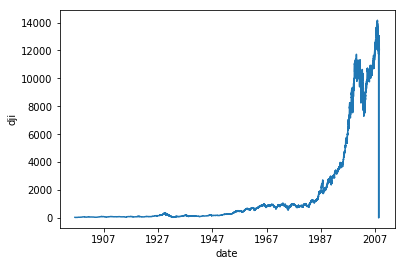

In [4]:
import wrds
import matplotlib.pyplot as plt
db = wrds.Connection()
data = db.raw_sql("select date,dji from djones.djdaily", date_cols=['date'], index_col=['date'])
plt.plot(data)
plt.xlabel('date')
plt.ylabel('dji')
plt.show()

<div class="alert alert-block alert-info">
<b>NOTE:</b> Alternatively, you could submit the query (line 4 above) using the get_table() command as follows
</div>

In [ ]:
data = db.get_table("djones", "djdaily", columns=['date','dji'], date_cols=['date'], index_col=['date'])

Python will draw your graph through the X Windows system, plotted by date against the Dow Jones Index, and label both axes.

## 5. Saving Your Graph

<div class="rich-text">
    <p>To save the graph to a file, use the command <strong>plt.savefig('</strong><strong><em>my_graph.png</em></strong><strong>'),</strong> where '<em>my_graph.png'</em> is the filename enclosed in single quotes.</p>
    <ul><li>If you are on the WRDS Cloud, this will save the graph to to your current working directory on the WRDS Cloud, which is likely in your home directory.</li>
        <li>If you are instead connect to WRDS data from your computer, you'll be saving this file to your local hard drive.</li></ul>
</div>